In [2]:
import warnings
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from category_encoders import OneHotEncoder
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
def wrangle(filepath):
    # read csv file to dataframe
    df = pd.read_csv(filepath)

    # replacing column value in "Leather interior"
    df["Leather interior"] = df["Leather interior"].replace({"Yes":1, "No":0})

    #replace and change the dtype of "Mileage" column
    df['Mileage'] = df['Mileage'].str.replace("km", " ").astype("int64")

    # create a new column "car_age"
    df["car_age"] = 2025 - df["Prod. year"]
    
    # drop "Prod. year"
    df.drop(columns="Prod. year", inplace=True)

    # creating a new column from "Engine volume" named "Turbo"
    df["Turbo"] = df["Engine volume"].str.contains("Turbo").astype(int)
    # recasting the "Engine volume" column
    df["Engine volume"] = df["Engine volume"].str.replace("Turbo", "").astype(float)

    # drop column with high cardinality
    df.drop(columns='ID', inplace=True)
    # drop multicollinearlity feature -- 'Cylinders'
    df.drop(columns='Cylinders', inplace=True)
    return df

In [4]:
df = wrangle("MY DATASETS/train.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  int64  
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  float64
 8   Mileage           19237 non-null  int64  
 9   Gear box type     19237 non-null  object 
 10  Drive wheels      19237 non-null  object 
 11  Doors             19237 non-null  object 
 12  Wheel             19237 non-null  object 
 13  Color             19237 non-null  object 
 14  Airbags           19237 non-null  int64  
 15  car_age           19237 non-null  int64  
 16  Turbo             19237 non-null  int32 

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,car_age,Turbo
0,13328,1399,LEXUS,RX 450,Jeep,1,Hybrid,3.5,186005,Automatic,4x4,04-May,Left wheel,Silver,12,15,0
1,16621,1018,CHEVROLET,Equinox,Jeep,0,Petrol,3.0,192000,Tiptronic,4x4,04-May,Left wheel,Black,8,14,0
2,8467,-,HONDA,FIT,Hatchback,0,Petrol,1.3,200000,Variator,Front,04-May,Right-hand drive,Black,2,19,0
3,3607,862,FORD,Escape,Jeep,1,Hybrid,2.5,168966,Automatic,4x4,04-May,Left wheel,White,0,14,0
4,11726,446,HONDA,FIT,Hatchback,1,Petrol,1.3,91901,Automatic,Front,04-May,Left wheel,Silver,4,11,0


In [9]:
# checking the number of unique value(s) in each column in our dataset
# df.nunique()

In [8]:
df.select_dtypes("object").columns

Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [19]:
# Checking which feature is more correlated with our target variable
# df['Price'].corr(df["Engine volume"])
# df['Price'].corr(df['Cylinders'])

In [20]:
# creating a correlation matrix
corr = df.select_dtypes("number").drop(columns="Price").corr()
corr

,Leather interior,Engine volume,Mileage,Airbags,car_age,Turbo
Leather interior,1.000000,0.274647,-0.034379,0.165023,-0.390066,-0.104140
Engine volume,0.274647,1.000000,-0.006289,0.224441,0.030906,-0.017052
Mileage,-0.034379,-0.006289,1.000000,-0.009201,0.063501,-0.001511
Airbags,0.165023,0.224441,-0.009201,1.000000,-0.236969,0.061623
car_age,-0.390066,0.030906,0.063501,-0.236969,1.000000,0.076129
Turbo,-0.104140,-0.017052,-0.001511,0.061623,0.076129,1.000000


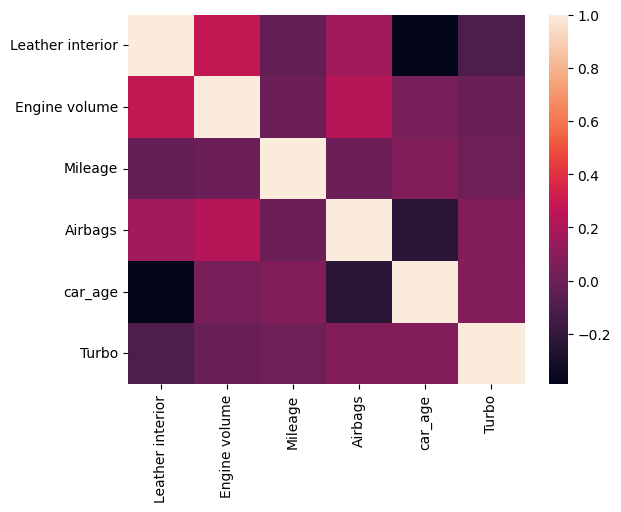

In [21]:
# plot a correlation heatmap
corr = df.select_dtypes("number").drop(columns="Price").corr()
sns.heatmap(corr);

In [13]:
# scatterplot 
# plt.scatter(df[""])